<a href="https://colab.research.google.com/github/jcandane/PhysicsI_Labs/blob/main/SHO.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Title-of-Work

Your Name

Date

#  <font color='Red'> **Import Necessary Modules** </font>

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from numpy.linalg import norm

π = np.pi

###  <font color='Red'> Before we start lets define the times in which all our experiments will take place. </font>

###  <font color='Red'> Define a time-increment (Δt), initial (t0), and a final (tf) time for your experiment. And with it a time_array. </font>

In [2]:
Δt = 0.1 ### s(detector)
t0 = 0 
tf = 100

timeline = np.arange(t0, tf, Δt)
T = len(timeline)

#   <font color='Red'> **Experiment I: Gravity Free-Fall** </font>

##   <font color='Red'> To begin lets start with by defining an initial position, initial velocity, and mass. </font>

In [3]:
Δt = 0.001 ### s(detector)
t0 = 0 
tf = 100

timeline = np.arange(t0, tf, Δt)
T = len(timeline)

x_0  = np.array([0.33, 0., 0.]) ## m
v_0  = np.array([0., 0., 0.]) ## m/s
mass = 10  ## kg

##   <font color='Red'> Define a for-loop to Velocity-Verlet integrate the motion to obtain a x_t, v_t, and a_t. </font>

In [4]:
x_t = np.zeros((len(timeline), 3))
v_t = np.zeros((len(timeline), 3))
a_t = np.zeros((len(timeline), 3))

k = 0.25 ### 

x_eq = np.array([0.25, 0., 0.])  ## m

x_t[0] = x_0
v_t[0] = v_0
a_t[0] = -k * (x_t[0] - x_eq ) / mass
for t in range(1,len(timeline)):
  x_t[t] = x_t[t-1] + v_t[t-1] * Δt + 0.5 * a_t[t-1] * Δt*Δt
  a_t[t] = -k * (x_t[t-1] - x_eq ) / mass
  v_t[t] = v_t[t-1] + 0.5 * ( a_t[t-1] + a_t[t] ) * Δt

###   <font color='Red'> Take a time-derivative of x_t to obtain dxdt_t. </font>

###   <font color='Red'> Take a time-derivative of v_t to obtain dvdt_t. </font>

In [5]:
dxdt_t = np.gradient(x_t, axis=0)/Δt
dvdt_t = np.gradient(v_t, axis=0)/Δt

###   <font color='Red'> Make 3 plots of with: x_t, \{v_t, dxdt_t\}, and \{ a_t, dv/dt_t f_t/mass\} in matplotlib, all as a function of time. Make sure to include all LABELS!. </font>

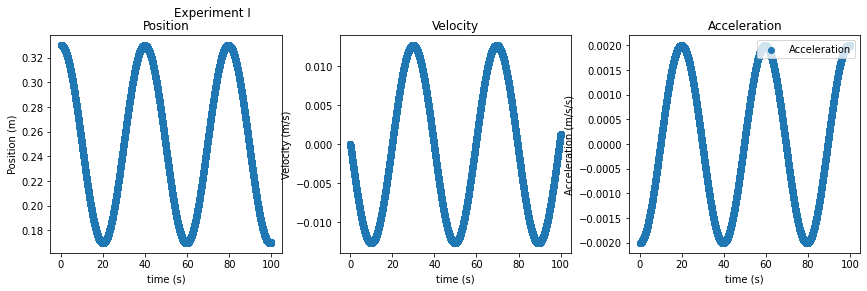

In [6]:
fig, (ax1, ax2, ax3) = plt.subplots(1, 3)
fig.suptitle('Experiment I')
fig.subplots_adjust(hspace=0.01, wspace=0.25, right=2)

ax1.scatter(timeline, x_t[:,0])
ax1.set_title("Position")
ax1.set(xlabel='time (s)', ylabel='Position (m)')

ax2.scatter(timeline, v_t[:,0])
ax2.set_title("Velocity")
ax2.set(xlabel='time (s)', ylabel='Velocity (m/s)')

ax3.scatter(timeline, a_t[:,0], label="Acceleration")
ax3.legend(loc="upper right")
ax3.set_title("Acceleration")
ax3.set(xlabel='time (s)', ylabel='Acceleration (m/s/s)')

fig.show()

## Exp Exp

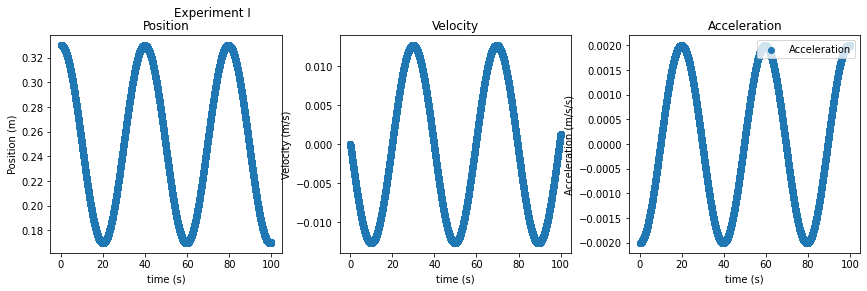

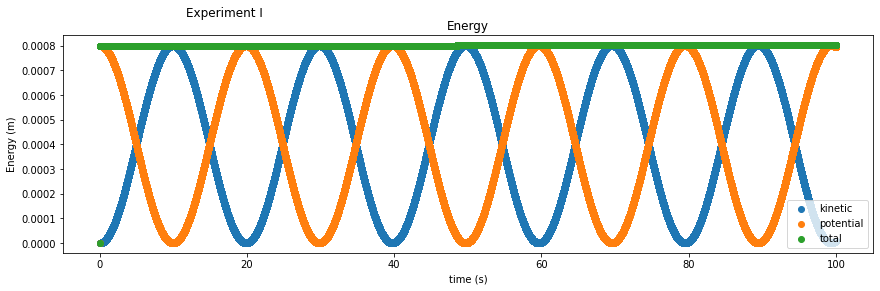

In [7]:
x_t = np.zeros((len(timeline), 3))
v_t = np.zeros((len(timeline), 3))
a_t = np.zeros((len(timeline), 3))

k = 0.25 ###
γ = 0. #0.000125

x_eq = np.array([0.25, 0., 0.])  ## m

x_t[0] = x_0
v_t[0] = v_0
a_t[0] = -k * (x_t[0] - x_eq ) / mass

K = np.zeros(len(timeline))
U = np.zeros(len(timeline))
for t in range(1,len(timeline)):
  Δx = x_t[t-1] - x_eq
  
  K[t] = mass * norm(v_t[t-1])**2/2 ## save kinetic energy
  U[t] = k * norm( Δx )**2 / 2 ## save potential energy

  x_t[t] = x_t[t-1] + v_t[t-1] * Δt + 0.5 * a_t[t-1] * Δt*Δt
  a_t[t] = -k * Δx / mass - γ*v_t[t-1]/mass
  v_t[t] = v_t[t-1] + 0.5 * ( a_t[t-1] + a_t[t] ) * Δt



fig, (ax1, ax2, ax3) = plt.subplots(1, 3)
fig.suptitle('Experiment I')
fig.subplots_adjust(hspace=0.01, wspace=0.25, right=2)

ax1.scatter(timeline, x_t[:,0])
ax1.set_title("Position")
ax1.set(xlabel='time (s)', ylabel='Position (m)')

ax2.scatter(timeline, v_t[:,0])
ax2.set_title("Velocity")
ax2.set(xlabel='time (s)', ylabel='Velocity (m/s)')

ax3.scatter(timeline, a_t[:,0], label="Acceleration")
ax3.legend(loc="upper right")
ax3.set_title("Acceleration")
ax3.set(xlabel='time (s)', ylabel='Acceleration (m/s/s)')

fig.show()

fig, (ax1) = plt.subplots(1)
fig.suptitle('Experiment I')
fig.subplots_adjust(hspace=0.01, wspace=0.25, right=2)

ax1.scatter(timeline, K, label="kinetic")
ax1.scatter(timeline, U, label="potential")
ax1.scatter(timeline, K+U, label="total")
ax1.set_title("Energy")
ax1.set(xlabel='time (s)', ylabel='Energy (m)')
ax1.legend(loc="lower right")

fig.show()

## Morse Potential

$V(r)=D_{e}(e^{-2a(r-r_{e})}-2e^{-a(r-r_{e})})$

$f(r)= -\frac{dV(r)}{dr} = - D_{e}(-2a e^{-2a(r-r_{e})}-2(-a)e^{-a(r-r_{e})}) = 2a D_{e}(e^{-2a(r-r_{e})}-e^{-a(r-r_{e})})$

$a={\sqrt {k_{e}/2D_{e}}},$

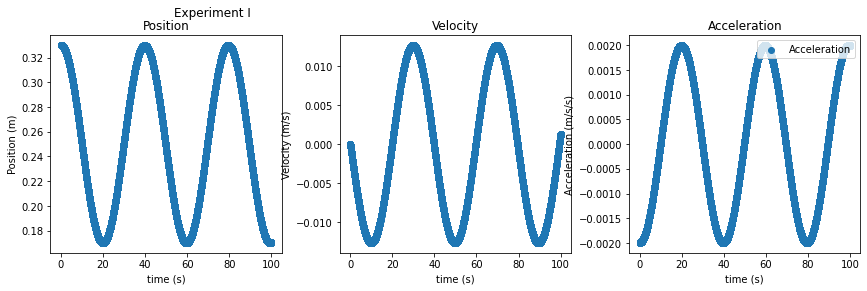

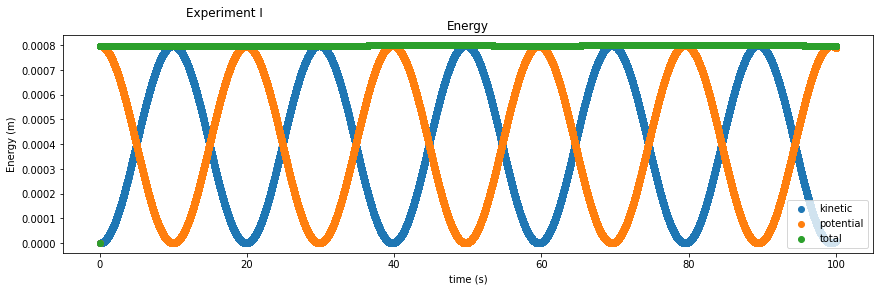

In [8]:
Δt
timeline = np.arange(0, 100, Δt)

x_t = np.zeros((len(timeline), 3))
v_t = np.zeros((len(timeline), 3))
a_t = np.zeros((len(timeline), 3))

k  = 0.25 ### 
De = 500.0
a  = np.sqrt(k/(2*De))
γ  = 0*0.0125

x_eq = np.array([0.25, 0., 0.])  ## m

x_t[0] = x_0
v_t[0] = v_0
a_t[0] = -k * (x_t[0] - x_eq ) / mass

K = np.zeros(len(timeline))
U = np.zeros(len(timeline))
for t in range(1,len(timeline)):

  x_t[t] = x_t[t-1] + v_t[t-1] * Δt + 0.5 * a_t[t-1] * Δt*Δt
  Δx     = x_t[t-1] - x_eq
  
  a_t[t] = 2*a*De * (np.exp( - 2*a*Δx ) - np.exp( - a*Δx ) )/mass - γ*v_t[t-1]/mass ## divide by mass!!!
  K[t]   = mass * norm(v_t[t-1])**2/2 ## save kinetic energy
  U[t]   = De * (np.exp( - 2*a*norm(Δx) ) - 2*np.exp( - a* norm(Δx) ) ) + De  # k * np.linalg.norm( Δx )**2 / 2 ## save potential energy
  
  v_t[t] = v_t[t-1] + 0.5 * ( a_t[t-1] + a_t[t] ) * Δt

fig, (ax1, ax2, ax3) = plt.subplots(1, 3)
fig.suptitle('Experiment I')
fig.subplots_adjust(hspace=0.01, wspace=0.25, right=2)

ax1.scatter(timeline, x_t[:,0])
ax1.set_title("Position")
ax1.set(xlabel='time (s)', ylabel='Position (m)')

ax2.scatter(timeline, v_t[:,0])
ax2.set_title("Velocity")
ax2.set(xlabel='time (s)', ylabel='Velocity (m/s)')

ax3.scatter(timeline, a_t[:,0], label="Acceleration")
ax3.legend(loc="upper right")
ax3.set_title("Acceleration")
ax3.set(xlabel='time (s)', ylabel='Acceleration (m/s/s)')

fig.show()

fig, (ax1) = plt.subplots(1)
fig.suptitle('Experiment I')
fig.subplots_adjust(hspace=0.01, wspace=0.25, right=2)

ax1.scatter(timeline, K, label="kinetic")
ax1.scatter(timeline, U, label="potential")
ax1.scatter(timeline, K+U, label="total")
ax1.set_title("Energy")
ax1.set(xlabel='time (s)', ylabel='Energy (m)')
ax1.legend(loc="lower right")

fig.show()

#   <font color='Red'> **Experiment II: 2-body** </font>

###  <font color='Red'> To begin lets start with by defining an initial position & velocity, and mass. </font>

In order to construct the N-particle Morse Potential, we require

Input: R_ix, Timeline, masses, k_ij, De_ij, γ, 

In [9]:
Δt = 0.001 ### s(detector)
tf = 50
timeline = np.arange(0, tf, Δt)

k  = 0.25 ### 
De = 500000.0
x_eq = np.array([0.6, 0., 0.])  ## m

a  = np.sqrt(k/(2*De))
γ  = 0. #0*0.0125

## Morse Parameters: k_ij, De_ij, r0_ij
## m_i, γ_i 

m_i  = np.array([2., 2.])
R_ix = np.array([[1., 0., 0.],[2., 0., 0.]])

v_ix = np.zeros((2,3))
a_ix = np.zeros((2,3)) #np.sum( - k * R_ijx, axis=0)
### empty arrays to save data
R_tix = np.zeros( (len(timeline), R_ix.shape[0], R_ix.shape[1] ) )
K     = np.zeros(len(timeline))
U     = np.zeros(len(timeline))

#R_ijx  = R_ix[None, :, :] - R_ix[:, None, :]
#R_ijx += np.array([[np.zeros(3), -x_eq], [x_eq,np.zeros(3)]]) ### !!!!
#a_ix   = 2*a*De * np.sum( (np.exp( - 2*a*R_ijx ) - np.exp( - a*R_ijx ) ) , axis=0)/m_i[:, None] - γ*v_ix/m_i[:, None]
##K[0]   = np.sum( m_i * norm(v_ix, axis=1)**2/2 ) ## save kinetic energy
#U[0]   = De * np.sum( (np.exp( - 2*a*norm(R_ijx, axis=2) ) - 2*np.exp( - a*norm(R_ijx, axis=2) ) ))/2 + 2*De ## save potential energy
##U[0]   = np.sum( k * norm(R_ijx, axis=2)**2 / 2)
#R_tix[0] = 1.*R_ix
for t in range(len(timeline)):

    
    R_ix  += v_ix * Δt + 0.5 * a_ix * Δt*Δt
    R_tix[t] = 1.*R_ix
    R_ijx  = R_ix[None, :, :] - R_ix[:, None, :]
    R_ijx += np.array([[np.zeros(3), -x_eq], [x_eq,np.zeros(3)]]) ### !!!!
    
    #A_ix   = 2*a*De * np.sum( (np.exp( - 2*a*R_ijx ) - np.exp( - a*R_ijx ) ) , axis=0)/m_i[:, None] - γ*v_ix/m_i[:, None]
    A_ix   = np.sum( - k * R_ijx, axis=0)

    K[t]   = np.sum( m_i * norm(v_ix, axis=1)**2/2 ) ## save kinetic energy
    #U[t]   = De * np.sum( (np.exp( - 2*a*norm(R_ijx, axis=2) ) - 2*np.exp( - a*norm(R_ijx, axis=2) ) ))/2 + 2*De ## save potential energy
    U[t]   = np.sum( k * norm(R_ijx, axis=2)**2 / 2)

    v_ix  += ( a_ix + A_ix ) * Δt / 2
    a_ix   = A_ix

    

In [10]:
A = np.array([[0,1],[1,0]]) ## adjacency matrix

X_eq  = np.einsum("ij,x->ijx", np.triu(A) - np.triu(A).T, x_eq)
k_ij  = A * k
E0_ij = A * De


k_ij

array([[0.  , 0.25],
       [0.25, 0.  ]])

###  <font color='Red'> Define a force as a function of time, with a bump function. Plot the result in time. </font>

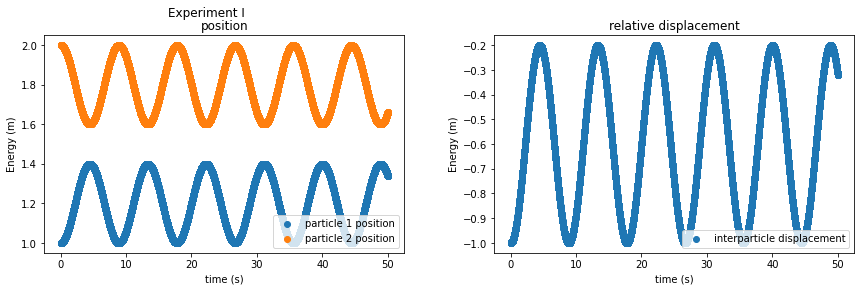

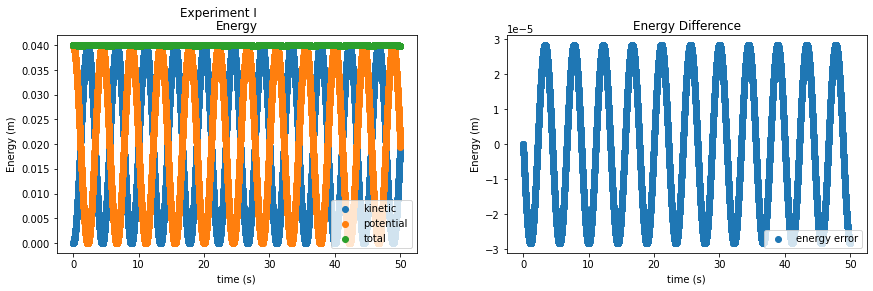

In [11]:
fig, (ax1, ax2) = plt.subplots(1,2)
fig.suptitle('Experiment I')
fig.subplots_adjust(hspace=0.01, wspace=0.25, right=2)

ax1.scatter(timeline, R_tix[:, 0, 0], label="particle 1 position")
ax1.scatter(timeline, R_tix[:, 1, 0], label="particle 2 position")
ax1.set_title("position")
ax1.set(xlabel='time (s)', ylabel='Energy (m)')
ax1.legend(loc="lower right")

ax2.scatter(timeline, R_tix[:, 0, 0]-R_tix[:, 1, 0], label="interparticle displacement")
ax2.set_title("relative displacement")
ax2.set(xlabel='time (s)', ylabel='Energy (m)')
ax2.legend(loc="lower right")
fig.show()


fig, (ax1, ax2) = plt.subplots(1,2)
fig.suptitle('Experiment I')
fig.subplots_adjust(hspace=0.01, wspace=0.25, right=2)

ax1.scatter(timeline, K, label="kinetic")
ax1.scatter(timeline, U, label="potential")
ax1.scatter(timeline, K+U, label="total")
ax1.set_title("Energy")
ax1.set(xlabel='time (s)', ylabel='Energy (m)')
ax1.legend(loc="lower right")

ax2.scatter(timeline, (K+U) - (K+U)[0], label="energy error")
ax2.set_title("Energy Difference")
ax2.set(xlabel='time (s)', ylabel='Energy (m)')
ax2.legend(loc="lower right")

fig.show()

###  <font color='Red'> Define a for-loop to Velocity-Verlet integrate the motion to obtain a x_t, v_t, and a_t. </font>